<a href="https://colab.research.google.com/github/202201617/2022/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EC%9D%8C%EB%A3%8C_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_209 (Dense)           (None, 8)                 32        
                                                                 
 dense_210 (Dense)           (None, 12)                108       
                                                                 
 dense_211 (Dense)           (None, 16)                208       
                                                                 
 dense_212 (Dense)           (None, 18)                306       
                                                                 
 dense_213 (Dense)           (None, 30)                570       
                                                                 
 dense_214 (Dense)           (None, 6)                 186       
                                                                 
Total params: 1,410
Trainable params: 1,410
Non-train

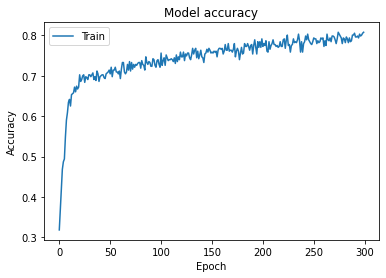

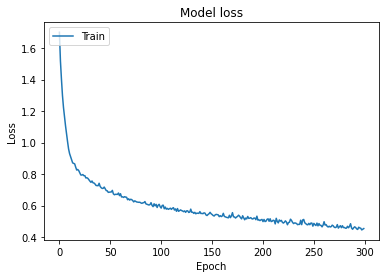

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/202201617/data/main/caffeine.csv"
df = pd.read_csv(url)

x = df.iloc[:,1:4]
y = df.iloc[:,4]

y = pd.get_dummies(y)

standardized_data = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(standardized_data, y, test_size = 0.3, shuffle = True)

model = Sequential()
model.add(Dense(8, input_dim=3, activation='relu')) 
model.add(Dense(12, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(6, activation='softmax')) 
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=300, batch_size=10)

score = model.evaluate(x_test, y_test)
print('Test accuracy: ', score[1])

plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
